<a href="https://colab.research.google.com/github/UTDataMining/2022A/blob/main/ex7/ex7_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX7 Principal Component Analysis

Points
- Q1 2P
- Q2 8P

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q1 Covariance matrix

Suppose we have the following corresponding $n$ values between two variables $x$,$y$:

$x=(x^{(1)},x^{(2)},... ,x^{(n)})$, 

$y=(y^{(1)},y^{(2)},... ,y^{(n)})$.

When $\overline{x}, \overline{y}$ are
means of $x$ and $y$ respectively, covariance between $x$ and $y$ can be calculated as follows:

$ \Sigma_{i=1}^{n} (x^{(i)}- \overline{x}) (y^{(i)}- \overline{y})/n$


Covariance is used to represent the relationship between variables. The normalized covariance becomes the correlation coefficient.

For multiple variables, the list of variances (for same variables) and covariances (for different variables) between variables represented in the form of a matrix is called a variance-covariance matrix (hereafter simply called a covariance matrix).
The following matrix shows a covariance matrix for two variables.

$
   \left(
    \begin{array}{cc}
        \Sigma_{i=1}^{n}(x^{(i)}- \overline{x})^2/n  &  \Sigma_{i=1}^{n} (x^{(i)}- \overline{x}) (y^{(i)}- \overline{y})/n  \\
      \Sigma_{i=1}^{n} (x^{(i)}- \overline{x}) (y^{(i)}- \overline{y})/n　 &  \Sigma_{i=1}^{n}(y^{(i)}- \overline{y})^2/n 
    \end{array}
  \right)
$

Complete the following `cov_matrix` function that takes a matrix (a two-dimensional array) with the argument `X` and returns a covariance matrix (a two-dimensional array) between columns of `X` with each column as a variable.

In [ ]:
def cov_matrix(X):
    ### Argument：
    # X: matrix
    m = X.shape[0]
    n = X.shape[1]
    cov = np.zeros((n,n))

    ...

    return cov

Once your function is complete, run the following cell. It returns the covariance matrix between features in `iris` dataset. The sum of the matrix elements should be about 9.6.


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris() 
X = iris['data']
print(cov_matrix(X))
print(np.sum(cov_matrix(X)))

There is the `cov` function in NumPy to estimate a covariance matrix.


In [ ]:
np.cov(X, rowvar=0, ddof=0)

## Q2 Principal component analysis

In the following, we implement the `pca` function to perform dimensionality reduction of features using principal component analysis. The `pca` function takes an input data matrix (number of data ($m$)$\times$of dimensions ($n$)) with the first argument `X` and the number of reduced dimensions with the second argument `k`, and returns the matrix of input data reduced to `k` dimensions (number of data ($m$)$\times$of dimensions ($k $)) and its cumulative contribution ratio.

In particular, the `pca` function performs dimensionality reduction according to the following procedure.

- Standardization of each dimension (feature)
    - Standardize each dimension (feature) of an input data to mean 0 and variance 1. 
- Covariance matrix between features
    - Create a covariance matrix ($n \times n$) between the standardized features
- Calculate eigenvalues and eigenvectors of the covariance matrix
    - The `NumPy` `np.linalg.eig` function is used to calculate eigenvalues and eigenvectors. If a matrix is given to the `np.linalg.eig` function as follows, it returns an array `w` whose elements are the eigenvalues of that matrix and a matrix `v` (2D array) whose columns are the eigenvectors corresponding to those eigenvalues.
```Python
w, v = np.linalg.eig(matrix)
```
- Represent the original data in coordinates with $k$ eigenvectors (principal components) as basis.
    - For the eigenvalues and eigenvectors calculated above, select $k$ eigenvectors in order of increasing order of their corresponding eigenvalues and use them as new basis.
        - For example, if $n=4$, $k=2$ and 4-dimensional data is to be reduced to 2 dimensions, two eigenvectors $v_1$, $v_2$ are selected in order of increasing eigenvalues. The original data $x^{(i)}$ is represented as $x^{(i)}_{new}$ in coordinates with  $v_1$, $v_2$ as new basis by calculating inner products between $x^{(i)}$ and $v_1$, $v_2$.
          - $x^{(i)}_{new}=(x^{(i)}v_1, x^{(i)}v_2)$ (coordinates with $v_1, v_2$ as basis)
    - Consider the input data matrix $X$($x^{(1)},x^{(2)},... ,x^{(m)}$ as row vectors) and the eigenvector matrix consisting of $k$ eigenvectors ($v_1,v_2, ..., v_k$ as column vectors), the `pca` function returns the data (in the form of matrix) reduced to $k$-dimension based on $v_1,v_2,...,v_k$, which is represented as follows:

$
    \left(
    \begin{array}{c}
      x^{(1)}_{new}  \\
       x^{(2)}_{new}  \\
        ...  \\
         x^{(m)}_{new}  \\
    \end{array}
  \right)
  =
  \left(
    \begin{array}{c}
      x^{(1)}  \\
       x^{(2)}  \\
        ...  \\
         x^{(m)}  \\
    \end{array}
  \right)
    \left(
    \begin{array}{cccc}
      v_1 & v_2 & ... & v_k 
    \end{array}
  \right)
  =
  \left(
    \begin{array}{c}
      x^{(1)} v_1,  x^{(1)} v_2, ..., x^{(1)} v_k \\
       x^{(2)} v_1,  x^{(2)} v_2, ..., x^{(2)} v_k \\
    ...  \\
     x^{(m)} v_1,  x^{(m)} v_2, ..., x^{(m)} v_k \\ 
    \end{array}
  \right)
$

  - Cumulative contribution ratio
    - Cumulative contribution ratio is defined as ratio of the sum of top $k$ eigenvalues $\lambda_i(i=1,...,k)$ to the sum of all eigenvalues $\lambda_i(i=1,...,n)$. The `pca` function also returns this cumulative contribution ratio together with the data reduced to $k$-dimensions
      - $\Sigma_{i=1}^k\lambda_i/\Sigma_{i=1}^n\lambda_i$.

Complete the `pca` function according to the above prodecure.


In [ ]:
def pca(X, k):
    ### Arguments：
    # X: Input matrix ((m,n))
    # k: the number of reduced dimensions

    ### 1. 入力データの各列を標準化するコード（分散は標準分散としてよい）
    
    ### 2. 1.で標準化した入力データの列間の共分散行列を作成するコード（分散、共分散は標準分散としてよい）
    
    ### 3. 共分散行列の固有値・固有ベクトルを計算するコード
      # 固有値の大きい順にk個の固有ベクトル（vの列ベクトル）は以下のように指定できる
      # ind = np.argsort(w)[::-1] # 固有値の大きい順に並び替えた時のwのインデックス
      # w[ind[:k]] # k個の固有値
      # v[:, ind[:k]] # k個の固有ベクトル
    
    ### 4. 標準化した入力データをk個の固有ベクトルを基底とした座標で表した行列を求めるコード

    ### 5. 累積寄与率を計算するコード
    
    return ### 4.の行列と5.の累積寄与率を返す

Once the `pca` function is complete, run the following cells.

Each cell should visualize the result of dimension reduction of features in `iris` dataset.
The data points are colour-coded by their flower type.

The cumulative contribution ratio when reduced to one dimension is approximately 0.72, while the cumulative contribution ratio when reduced to two dimensions is approximately 0.95, indicating that the first and second principal components mostly account for the entire data.


In [ ]:
D, P=pca(X, 1) # 1次元に縮約
print(P) # 累積寄与率

plt.figure(figsize=(7,5))
plt.xlabel("1st Principal Component")
plt.scatter(D[:,0], np.zeros(D.shape[0]),c=iris.target);

In [ ]:
D, P=pca(X, 2) # 2次元に縮約
print(P) # 累積寄与率

plt.figure(figsize=(7,5))
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.scatter(D[:,0], D[:,1],c=iris.target);

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

D, P=pca(X, 3) # 3次元に縮約
print(P) # 累積寄与率

ax = Axes3D(plt.figure())
ax.scatter(D[:,0], D[:,1], D[:,2],c=iris.target);

## PCA in scikit-learn




0.9581320720000165


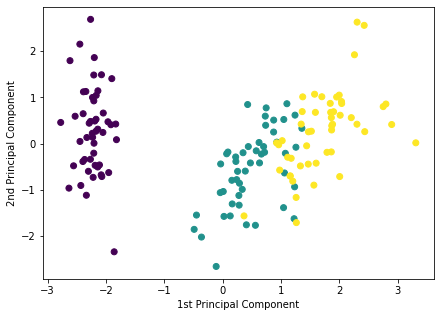

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris() 

# 標準化
scaler = StandardScaler()
X = scaler.fit_transform(iris['data'])

model = PCA(n_components=2) # 2次元に縮約
model.fit(X) 
D=model.transform(X) 
print(np.sum(model.explained_variance_ratio_)) # 累積寄与率

plt.figure(figsize=(7,5))
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.scatter(D[:,0], D[:,1],c=iris.target);

0.9948212908928452


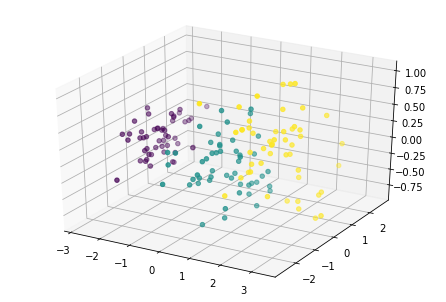

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

model = PCA(n_components=3) # 3次元に縮約
model.fit(X) 
D=model.transform(X) 
print(np.sum(model.explained_variance_ratio_)) # 累積寄与率

ax = Axes3D(plt.figure())
ax.scatter(D[:,0], D[:,1], D[:,2],c=iris.target);

## Code Testing


In [ ]:
## Run this cell first
!pip install prog_edu_assistant_tools
import re
import sys
import jinja2
from IPython.core import display
from google.colab import _message as google_message
from prog_edu_assistant_tools.magics import report, autotest, CaptureOutput
from prog_edu_assistant_tools.check import Check

## Q1

In [ ]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q1')

## Q2

In [ ]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q2')